Title: Computational Fluid Dynamics 01: Rectangular grids without for loops
Date: 2017-05-03 08:30
Category: ComputationalFluidDynamics
Tags: Python, grid generation
Slug: cfd-01-rectangular-grid-genereation-python
Cover: /p5101/img5101/output_7_0.png
Authors: Peter Schuhmacher
Summary: Vectorized Python code to generate basic rectangular grids

### Aequidistant rectangular grids
When the area of interest can be discretizised by a rectangular aequidistant grid, we do  not need explicit variables **x** and **y** to define the grid. The mesh sizes **dx** and **dy** are sufficient to discretizise the governing equations in this case. With streched and/or curvilinear grids, however, each grid point has to be computed and stored explicitly. In this case a aeqidistant rectangular grid is the starting point and by mapping the streched and/or curvilinear grid is computed.

### Algebraic grids
In this section we will consider algebraic grids. Algebraic grid means that the grid can be constructed by closed formulas for the mapping. On the other side are the numerical grids that contain a differential equation that has to be solved numerically. The starting point for each numerical is a algebraic grid however.

### Using the outer product to generate grids
The outer product - also called dyadic product - is a matrix multiplication. Better knwon than the outer product is the inner  product, also called dot product or scalar product, which is a matrix multiplication too.

For constructing a rectangular grid we need
- a 1-dimensional (nx,1)-matrix **X** containing the locations of the grid points in the x-direction
- a 1-dimensional (1,ny)-matrix **Y** containing the locations of the grid points in the y-direction
- an auxilliary matrix **onesX** with the same dimensions as **X** but all matrix elements are 1
- an auxilliary matrix **onesY** with the same dimensions as **Y** but all matrix elements are 1

$$
X =  \left[\begin{matrix}1\\2\\3\\4\end{matrix}\right] 
\;\;	\textrm{ ,  }\;\;
onesX = \left[\begin{matrix}1\\1\\1\\1\end{matrix}\right]
$$

$$
Y =  \left[\begin{matrix}10 & 20 & 30 & 40 & 50 & 60 & 70 & 80 & 90\end{matrix}\right], \\
onesY = \left[\begin{matrix}1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\end{matrix}\right]
$$

The **x-** and **y-**-coordinates for each grid point are given by

$$
x = X \cdot onesY \\
y = onesX \cdot Y
$$

$$
x = X*onesY =  \left[\begin{matrix}1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\2 & 2 & 2 & 2 & 2 & 2 & 2 & 2 & 2\\3 & 3 & 3 & 3 & 3 & 3 & 3 & 3 & 3\\4 & 4 & 4 & 4 & 4 & 4 & 4 & 4 & 4\end{matrix}\right]
\;\;	\textrm{ ,  }\;\;
y = onesX*Y =  \left[\begin{matrix}10 & 20 & 30 & 40 & 50 & 60 & 70 & 80 & 90\\10 & 20 & 30 & 40 & 50 & 60 & 70 & 80 & 90\\10 & 20 & 30 & 40 & 50 & 60 & 70 & 80 & 90\\10 & 20 & 30 & 40 & 50 & 60 & 70 & 80 & 90\end{matrix}\right]
$$

### A compact Python code for a rectangular grid

In the code we use **ix, iy** instead of **onesX, onesY**. This gives the following few lines of code without any *for-loop* to build a rectangular grid:

In [3]:
import numpy as np

nx = 38; ny = 18

#---- set the 1-dimensional arrays in x- and y-direction
ix = np.linspace(0,nx-1,nx)
iy = np.linspace(0,ny-1,ny)

#---- use the outer product of 2 vectors -----------
x = np.outer(ix,np.ones_like(iy))  # X = ix.T * ones(iy)
y = np.outer(np.ones_like(ix),iy)  # Y = ones(ix) * iy.T


#### plt.pcolormesh()

plt.pcolormesh() has changed its functionality. The dimension of the value parameter (z) must be of lower dimension than the dimesions of the corners (x,y). So we intruduce the helper function redu()-

In [4]:
def redu(A): return A[0:-1,0:-1]

#### The graphical display

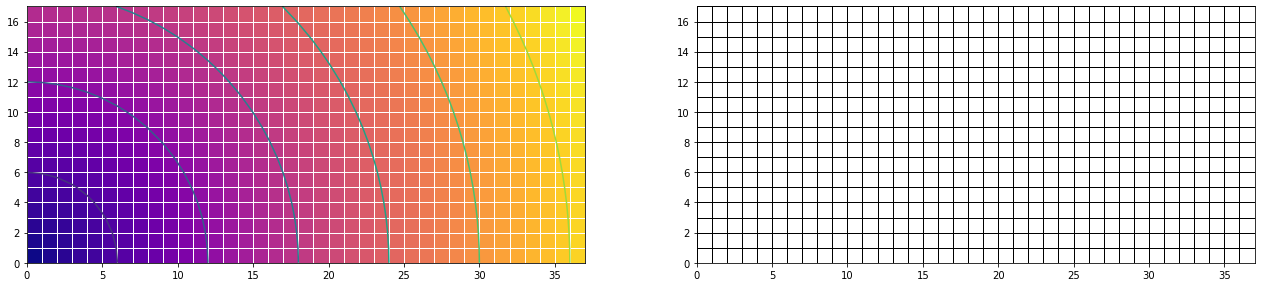

In [5]:
#====  The following is for the grafics ===============
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

z =np.sqrt(x*x + y*y) # set a fancy Z function
z1 = redu(z)
z2 = np.zeros_like(z1)

fig = plt.figure(figsize=(22,11)) 
ax1 = fig.add_subplot(121)
ax1.pcolormesh(x, y, z1, edgecolors='w',cmap="plasma")
ax1.contour(x, y, z)
ax1.set_aspect('equal')

myCmap = mclr.ListedColormap(['white','white'])
ax4 = fig.add_subplot(122)
ax4.pcolormesh(x, y, z2, edgecolors='k', lw=1, cmap=myCmap)
ax4.set_aspect('equal')
plt.show()